In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sentence_transformers import SentenceTransformer, util
from scipy.spatial import cKDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
import pickle
import re
from utils.normalizor import normalizor
import tqdm
import math

C:\Users\johnn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = SentenceTransformer('all-roberta-large-v1')
# model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
# model.load_state_dict(torch.load('model1.pt'))

In [3]:
correct = 0
dif = 0
mp = {}
ma = 0

plotx = []
ploty = []

In [4]:
tree : cKDTree
Comments = []

with open("data/data.pkl", "rb") as f:
    raw = pickle.load(f)
    tree = pickle.loads(raw)

with open("data/comments.pkl", "rb") as f:
    Comments = pickle.load(f)

In [5]:
import string
for num, (position, comment) in enumerate(Comments):

    q = tree.query(normalizor(model.encode(comment, convert_to_tensor=False)), 1)[1]

    miny = abs(q - num)
    if abs(q - num) < len(Comments) / 100:
        correct += 1

    plotx.append(num)
    ploty.append(miny)
    if num % 100 == 1:
        print("[{}/{}]({:.2f}%) correct:{}(rate:{:.2f}%)".format(num, len(Comments), num/len(Comments)*100, correct, correct / (num + 1) * 100))

print('{:.2f}%'.format(correct / len(Comments) * 100))

[1/16371](0.01%) correct:1(rate:50.00%)
[101/16371](0.62%) correct:40(rate:39.22%)
[201/16371](1.23%) correct:110(rate:54.46%)
[301/16371](1.84%) correct:158(rate:52.32%)
[401/16371](2.45%) correct:223(rate:55.47%)
[501/16371](3.06%) correct:275(rate:54.78%)
[601/16371](3.67%) correct:341(rate:56.64%)
[701/16371](4.28%) correct:383(rate:54.56%)
[801/16371](4.89%) correct:450(rate:56.11%)
[901/16371](5.50%) correct:527(rate:58.43%)
[1001/16371](6.11%) correct:587(rate:58.58%)
[1101/16371](6.73%) correct:656(rate:59.53%)
[1201/16371](7.34%) correct:708(rate:58.90%)
[1301/16371](7.95%) correct:770(rate:59.14%)
[1401/16371](8.56%) correct:831(rate:59.27%)
[1501/16371](9.17%) correct:878(rate:58.46%)
[1601/16371](9.78%) correct:952(rate:59.43%)
[1701/16371](10.39%) correct:1001(rate:58.81%)
[1801/16371](11.00%) correct:1038(rate:57.60%)
[1901/16371](11.61%) correct:1073(rate:56.41%)
[2001/16371](12.22%) correct:1115(rate:55.69%)
[2101/16371](12.83%) correct:1158(rate:55.09%)
[2201/16371](13

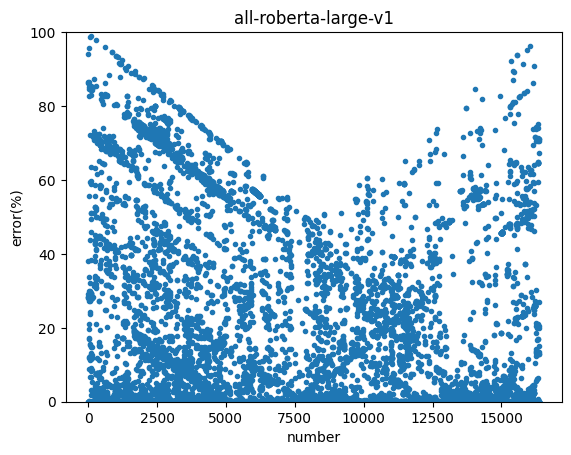

In [6]:
y = [y / len(Comments) * 100 for y in ploty]
plt.plot(plotx, y, '.')
plt.ylim(0, 100)
plt.xlabel("number")
plt.ylabel("error(%)")
plt.title("all-roberta-large-v1")
plt.show()